### In this exercise, you'll get to explore some additional features of the pandas library for cleaning and summarizing data. This will be done using the Nashville City Cemetery data.

#### As a reminder, you can get more information about the data that you were working with here: [Nashville City Cemetery Metadata](https://data.nashville.gov/api/views/diwx-fgj7/files/963c111e-2e2a-4133-a807-2becd590feb2?download=true&filename=Historic-Nashville-City-Cemetery-Interments-1846-1979-Metadata-v2.pdf).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. **Read the City Cemetery data** into a pandas DataFrame. **Hint:** see the [`read_excel` function](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [3]:
ap_df = pd.read_excel('../data/Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx')

In [4]:
ap_df.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia


In [5]:
ap_df.tail()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
19740,4-1846,"Kingsley, A., Capt.",Sep,9.0,28.0,1846.0,M,W,67.0,City,Feever,Cedar,lot,superintendent of Nashville Cemetery
19741,4-1846,infant,Sep,9.0,28.0,1846.0,M,W,NaN,City,Diarherea,Central,lot,son of John Bateman
19742,4-1846,"White, Lucinda",Sep,9.0,29.0,1846.0,F,W,25.0,City,Consumption,Central,200,Fees to be paid by M. Jennings
19743,5-1881,"Higgins, Rebecca",Apr,4.0,10.0,NaN,F,W,68.0,City,Heart Disease,Cherry,lot,"box paid, grave on lot"
19744,5-1881,"Eves, R.",Apr,4.0,25.0,NaN,M,W.,54.0,City,Heart Disease,Magnolia,lot,"box paid, grave on lot"


In [6]:
ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19745 entries, 0 to 19744
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Volume                 19745 non-null  object 
 1   Name                   19740 non-null  object 
 2   Burial Month           19706 non-null  object 
 3   Month No.              19706 non-null  float64
 4   Burial Day             19691 non-null  float64
 5   Burial Year            19743 non-null  float64
 6   Sex                    19503 non-null  object 
 7   Race                   19698 non-null  object 
 8   Age                    11071 non-null  float64
 9   Residence              19687 non-null  object 
 10  Cause of Death/Burial  19428 non-null  object 
 11  Ave                    19092 non-null  object 
 12  Section/Lot            18625 non-null  object 
 13  Remarks                16396 non-null  object 
dtypes: float64(4), object(10)
memory usage: 2.1+ MB


In [7]:
ap_df.isna().sum()

Volume                      0
Name                        5
Burial Month               39
Month No.                  39
Burial Day                 54
Burial Year                 2
Sex                       242
Race                       47
Age                      8674
Residence                  58
Cause of Death/Burial     317
Ave                       653
Section/Lot              1120
Remarks                  3349
dtype: int64

2. **Most Common Causes of Death.**  
   a. Find the 10 most common (known) recorded causes of death.  
   b. Clean up some of the misspellings. Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".   
   **Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings.  
   c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.  

In [8]:
ap_df['Cause of Death/Burial (Clean)'] = ap_df['Cause of Death/Burial'].replace({'Cholrea':'Cholera','Still Born':'Stillborn'})
ap_df.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks,Cause of Death/Burial (Clean)
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot,NaN
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of...",Cancer
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis,Old Age
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia,NaN
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia,NaN


In [9]:
top_10_deaths = ap_df['Cause of Death/Burial (Clean)'].value_counts().sort_values(ascending=False).head(10)
print(top_10_deaths)

Cause of Death/Burial (Clean)
Consumption     1767
Unknown         1260
Cholera         1242
Stillborn        926
Not Known        639
Old Age          604
Pneumonia        516
Flux             469
Complication     446
Cold             421
Name: count, dtype: int64


3. **Create a line chart** showing the number of burials per year.

In [10]:
burials_per_year = ap_df['Volume'].groupby(ap_df['Burial Year']).agg('count')
print(burials_per_year)

Burial Year
1846.0    246
1847.0    476
1848.0    447
1849.0    745
1850.0    809
         ... 
1972.0      2
1974.0      1
1977.0      3
1978.0      2
1979.0      3
Name: Volume, Length: 128, dtype: int64


Text(0.5, 1.0, 'Number of Burials Per Year')

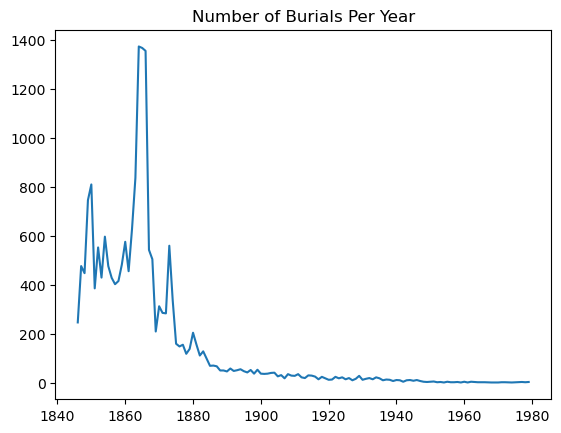

In [11]:
plt.plot(burials_per_year)
plt.title('Number of Burials Per Year')

4. **Burials per Month and Year**  
    a. Use the [crosstab function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.  
    b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.  
    c. Filter your table to show only the years 1846 through 1860.  
    **Bonus** Display your table so that it highlights any months that had over 100 burials. Hint: Look at styling in pandas: https://pandas.pydata.org/pandas-docs/version/1.0/user_guide/style.html  
    d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?

In [24]:
ap_df['Burial Year Int'] = ap_df['Burial Year'].astype('Int64')

In [25]:
pd.crosstab(ap_df['Burial Year Int'],ap_df['Month No.'])

Month No.,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Burial Year Int,,,,,,,,,,,,
1846,20,26,25,22,26,0,0,0,35,39,23,30
1847,43,34,38,35,26,47,40,61,35,47,36,34
1848,36,36,49,37,41,47,65,39,23,26,21,27
1849,46,64,64,43,62,231,96,36,28,18,24,33
1850,24,26,43,29,37,120,370,52,22,27,28,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1972,0,0,0,1,0,0,0,0,0,0,0,0
1974,0,0,0,0,0,0,0,0,0,0,1,0
1977,0,0,1,0,1,0,0,0,0,0,1,0


In [30]:
ap_1846_to_1860 = ap_df.where((ap_df['Burial Year Int'] >= 1846) & (ap_df['Burial Year Int'] <= 1860))

In [32]:
pd.crosstab(ap_1846_to_1860['Burial Year Int'],ap_1846_to_1860['Month No.'])

Month No.,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Burial Year Int,,,,,,,,,,,,
1846,20,26,25,22,26,0,0,0,35,39,23,30
1847,43,34,38,35,26,47,40,61,35,47,36,34
1848,36,36,49,37,41,47,65,39,23,26,21,27
1849,46,64,64,43,62,231,96,36,28,18,24,33
1850,24,26,43,29,37,120,370,52,22,27,28,31
1851,26,31,27,29,26,37,49,35,32,42,14,37
1852,37,32,39,37,58,84,76,54,31,32,36,36
1853,35,39,35,31,36,54,47,32,34,27,28,31
1854,35,33,34,43,61,137,95,44,34,25,25,30


    d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?

most_burials = ap_df['Volume'].groupby([ap_df['Burial Year'], ap_df['Month No.']]).agg('count').max()
print(most_burials)

# rob is going to help me figure out what the above code is doing (as it isn't doing what the question asks - perhaps getting max burials in a given year?)
# just getting info from crosstab to get the info for this question
# ok to hard code it in this instance - we're doing eda
# value count the column
# 1850 July max burials in a year/month

In [59]:
most_burials = ap_df[((ap_df['Burial Year Int'] == 1850) & (ap_df['Month No.'] == 7))]
most_burials.head()

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks,Cause of Death/Burial (Clean),Burial Year Int
17182,4-1850,Henry,Jul,7.0,1.0,1850.0,M,B,5.0,City,Cholrea,Poplar,50,slave of T. O. Harris,Cholera,1850
17183,4-1850,infant,Jul,7.0,1.0,1850.0,M,B,NaN,City,Teething,Poplar,old grave,"son of James Hendrix, Free",Teething,1850
17184,4-1850,Harrison,Jul,7.0,1.0,1850.0,M,B,24.0,S. N.,Cholrea,"Poplar, sextons fees paid",400,slave of W. H. Wilkerson,Cholera,1850
17185,4-1850,Silvy,Jul,7.0,1.0,1850.0,F,B,62.0,City,Cholrea,Poplar,200,slave of Berry Brown,Cholera,1850
17186,4-1850,"Kirby, E. G.",Jul,7.0,1.0,1850.0,M,W,2.0,S. N.,Cholrea,Oak box,lot,son of E. R. Kirby,Cholera,1850


In [62]:
july_1850_top_causes = most_burials['Cause of Death/Burial (Clean)'].value_counts().sort_values(ascending=False).head(10)
print(july_1850_top_causes)

Cause of Death/Burial (Clean)
Cholera           228
Not Known          46
Complicated        17
Teething           12
Diarhoera           8
Infl of Bowels      7
Consumption         7
Old Age             6
Infl of Brain       6
Feever              5
Name: count, dtype: int64


5. **Burials per Decade**  
    a. Create a "Decade" column to show the decade in which a burial occurred.    
    b. Examine the burials per decade. 
        (use crosstab) Look at the total number of burials and the proportion (aka percentage) of male burials and female burials.  
    c. Create a stacked bar chart to show how male and female burials have changed over time.


In [71]:
ap_df['Decade'] = ap_df['Burial Year Int'] - ap_df['Burial Year Int'] % 10
ap_df['Decade'].unique()

<IntegerArray>
[1970, 1960, 1950, 1940, 1930, 1920, 1910, 1870, 1880, 1900, 1890, 1860, 1850,
 1840, <NA>]
Length: 15, dtype: Int64

Text(0.5, 1.0, 'Number of Burials Per Decade')

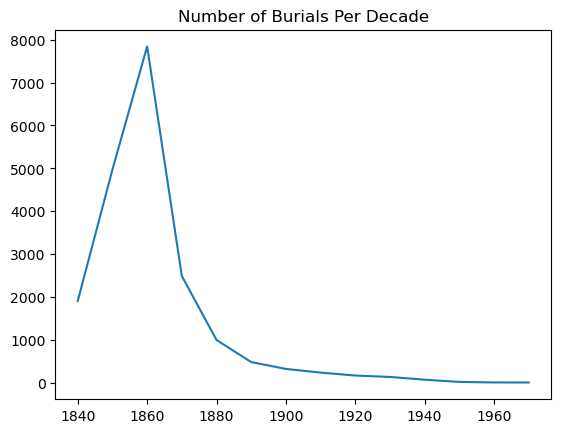

In [79]:
burials_per_decade = ap_df['Volume'].groupby(ap_df['Decade']).agg('count')
plt.plot(burials_per_decade)
plt.title('Number of Burials Per Decade')

could create a crosstab, chain the plot at the end of it
it could be easier to save crosstab to a variable

Text(0.5, 1.0, 'Deaths by Decade and Sex')

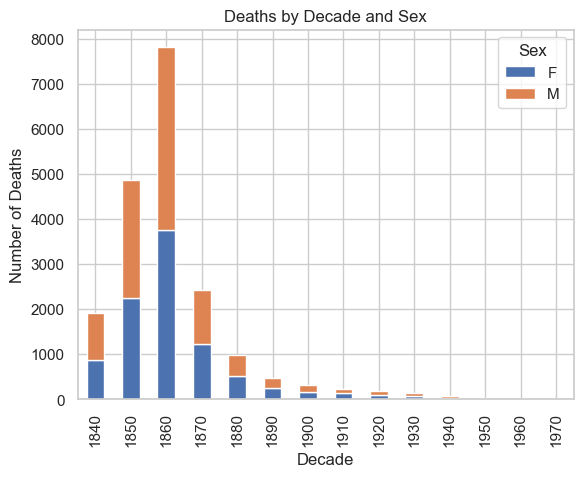

In [101]:
f_m_ap_df = ap_df[((ap_df['Sex'] == 'M') | (ap_df['Sex'] == 'F'))]
f_m_crosstab = pd.crosstab(f_m_ap_df['Decade'], f_m_ap_df['Sex'])
f_m_crosstab.plot(kind='bar', stacked=True)
plt.ylabel('Number of Deaths')
plt.title('Deaths by Decade and Sex')

### Bonus Questions

6. **Burials per Age Group**  
    a. Add a column to the original dataset to classify each row to one of the following categories (0-18, 19-25, 26-40, 41-64, and 65+). (Hint: One way to do this is using the [`cut` function](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)).  
    b. Create a "Year Group" dividing the records up based on burial year. Use the following groups: Before 1880, 1880-1900, 1901-1920, After 1920.  
    c. Use a grouped bar chart to show how the proportion of burials per age group has changed over time. How would you describe the trends in terms of proportion of burials per age group over time?


7. **Last Names**  
    a. Create a new column titled Last Name. Extract the last name from the Name column by subsetting to all characters to the left of the comma. (Hint: See the pandas [string split function](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html). When you do this, make sure to consider cases where the name does not contain a comma.  
    b. What are the most common last names that appear?

8. **The Civil War ended in April, 1865, with the last full year of fighting occurring in 1864.**    
   a. Create a new DataFrame, burials_1864 by subsetting the full data to the rows for 1864 burials.  
   b. For any rows whose name contains the word "infant" (capitalized or lowercase), replace the "Age" value with 0.   
   c. Create a new column called age_category. If the individual was age 0 put "Infant". If the individual was not an infant but under age 18, put "Child". Everyone aged 18 and above should be listed as "Adult".  
   d.  Find the mean age for each age group.    
   e.  Find the last infant to be buried in 1864. Two ways this could be accomplished are sorting by both the month number and burial day or by creating a date column (for example, by using the [`to_datetime` function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and then sorting by this date column.